# Imorting Libraries

In [53]:
import glob
import os.path
import pickle



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import sklearn 
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.utils import compute_class_weight


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dense, Dropout , BatchNormalization
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


print(tf.__version__)


import autosklearn.classification
import sklearn.model_selection
from supervised.automl import AutoML


from pylmeasure import *

2.5.0


In [2]:
#get_measurments('/home/sebastien/Bureau/NeuroMorpho/purkinje_ok/AZ_Adult1_10CELLS-1.CNG.swc')

In [3]:
def get_measurments(neuron):

    '''
    Extract features from neuron .swc file

    '''
    
    features = dict()

    features['Surface_TotalSum'] = getOneMeasure('Surface',neuron)['TotalSum']
    features['Surface_Compartments'] = getOneMeasure('Surface',neuron)['CompartmentsConsidered']
    features['Surface_Minimum'] = getOneMeasure('Surface',neuron)['Minimum']
    features['Surface_Average'] = getOneMeasure('Surface',neuron)['Average']
    features['Surface_Maximum'] = getOneMeasure('Surface',neuron)['Maximum']
    features['Surface_Std'] = getOneMeasure('Surface',neuron)['StdDev']


    features['Soma_Surface_TotalSum'] = getOneMeasure('Soma_Surface',neuron)['TotalSum']
    features['Soma_Surface_Compartments'] = getOneMeasure('Soma_Surface',neuron)['CompartmentsConsidered']
    features['Soma_Surface_Minimum'] = getOneMeasure('Soma_Surface',neuron)['Minimum']
    features['Soma_Surface_Average'] = getOneMeasure('Soma_Surface',neuron)['Average']
    features['Soma_Surface_Maximum'] = getOneMeasure('Soma_Surface',neuron)['Maximum']
    features['Soma_Surface_Std'] = getOneMeasure('Soma_Surface',neuron)['StdDev']


    features['N_stems_TotalSum'] = getOneMeasure('N_stems',neuron)['TotalSum']
    features['N_stems_Compartments'] = getOneMeasure('N_stems',neuron)['CompartmentsConsidered']
    features['N_stems_Minimum'] = getOneMeasure('N_stems',neuron)['Minimum']
    features['N_stems_Average'] = getOneMeasure('N_stems',neuron)['Average']
    features['N_stems_Maximum'] = getOneMeasure('N_stems',neuron)['Maximum']
    features['N_stems_Std'] = getOneMeasure('N_stems',neuron)['StdDev']

    features['N_bifs_TotalSum'] = getOneMeasure('N_bifs',neuron)['TotalSum']
    features['N_bifs_Compartments'] = getOneMeasure('N_bifs',neuron)['CompartmentsConsidered']
    features['N_bifs_Minimum'] = getOneMeasure('N_bifs',neuron)['Minimum']
    features['N_bifs_Average'] = getOneMeasure('N_bifs',neuron)['Average']
    features['N_bifs_Maximum'] = getOneMeasure('N_bifs',neuron)['Maximum']
    features['N_bifs_Std'] = getOneMeasure('N_bifs',neuron)['StdDev']

    features['N_branch_TotalSum'] = getOneMeasure('N_branch',neuron)['TotalSum']
    features['N_branch_Compartments'] = getOneMeasure('N_branch',neuron)['CompartmentsConsidered']
    features['N_branch_Minimum'] = getOneMeasure('N_branch',neuron)['Minimum']
    features['N_branch_Average'] = getOneMeasure('N_branch',neuron)['Average']
    features['N_branch_Maximum'] = getOneMeasure('N_branch',neuron)['Maximum']
    features['N_branch_Std'] = getOneMeasure('N_branch',neuron)['StdDev']

    features['N_tips_TotalSum'] = getOneMeasure('N_tips',neuron)['TotalSum']
    features['N_tips_Compartments'] = getOneMeasure('N_tips',neuron)['CompartmentsConsidered']
    features['N_tips_Minimum'] = getOneMeasure('N_tips',neuron)['Minimum']
    features['N_tips_Average'] = getOneMeasure('N_tips',neuron)['Average']
    features['N_tips_Maximum'] = getOneMeasure('N_tips',neuron)['Maximum']
    features['N_tips_Std'] = getOneMeasure('N_tips',neuron)['StdDev']

    features['Width_TotalSum'] = getOneMeasure('Width',neuron)['TotalSum']
    features['Width_Compartments'] = getOneMeasure('Width',neuron)['CompartmentsConsidered']
    features['Width_Minimum'] = getOneMeasure('Width',neuron)['Minimum']
    features['Width_Average'] = getOneMeasure('Width',neuron)['Average']
    features['Width_Maximum'] = getOneMeasure('Width',neuron)['Maximum']
    features['Width_Std'] = getOneMeasure('Width',neuron)['StdDev']

    features['Height_TotalSum'] = getOneMeasure('Height',neuron)['TotalSum']
    features['Height_Compartments'] = getOneMeasure('Height',neuron)['CompartmentsConsidered']
    features['Height_Minimum'] = getOneMeasure('Height',neuron)['Minimum']
    features['Height_Average'] = getOneMeasure('Height',neuron)['Average']
    features['Height_Maximum'] = getOneMeasure('Height',neuron)['Maximum']
    features['Height_Std'] = getOneMeasure('Height',neuron)['StdDev']

    features['Depth_TotalSum'] = getOneMeasure('Depth',neuron)['TotalSum']
    features['Depth_Compartments'] = getOneMeasure('Depth',neuron)['CompartmentsConsidered']
    features['Depth_Minimum'] = getOneMeasure('Depth',neuron)['Minimum']
    features['Depth_Average'] = getOneMeasure('Depth',neuron)['Average']
    features['Depth_Maximum'] = getOneMeasure('Depth',neuron)['Maximum']
    features['Depth_Std'] = getOneMeasure('Depth',neuron)['StdDev']

    features['Type_TotalSum'] = getOneMeasure('Type',neuron)['TotalSum']
    features['Type_Compartments'] = getOneMeasure('Type',neuron)['CompartmentsConsidered']
    features['Type_Minimum'] = getOneMeasure('Type',neuron)['Minimum']
    features['Type_Average'] = getOneMeasure('Type',neuron)['Average']
    features['Type_Maximum'] = getOneMeasure('Type',neuron)['Maximum']
    features['Type_Std'] = getOneMeasure('Type',neuron)['StdDev']

    features['Diameter_TotalSum'] = getOneMeasure('Diameter',neuron)['TotalSum']
    features['Diameter_Compartments'] = getOneMeasure('Diameter',neuron)['CompartmentsConsidered']
    features['Diameter_Minimum'] = getOneMeasure('Diameter',neuron)['Minimum']
    features['Diameter_Average'] = getOneMeasure('Diameter',neuron)['Average']
    features['Diameter_Maximum'] = getOneMeasure('Diameter',neuron)['Maximum']
    features['Diameter_Std'] = getOneMeasure('Diameter',neuron)['StdDev']

    features['Diameter_pow_TotalSum'] = getOneMeasure('Diameter_pow',neuron)['TotalSum']
    features['Diameter_pow_Compartments'] = getOneMeasure('Diameter_pow',neuron)['CompartmentsConsidered']
    features['Diameter_pow_Minimum'] = getOneMeasure('Diameter_pow',neuron)['Minimum']
    features['Diameter_pow_Average'] = getOneMeasure('Diameter_pow',neuron)['Average']
    features['Diameter_pow_Maximum'] = getOneMeasure('Diameter_pow',neuron)['Maximum']
    features['Diameter_pow_Std'] = getOneMeasure('Diameter_pow',neuron)['StdDev']

    features['Length_TotalSum'] = getOneMeasure('Length',neuron)['TotalSum']
    features['Length_Compartments'] = getOneMeasure('Length',neuron)['CompartmentsConsidered']
    features['Length_Minimum'] = getOneMeasure('Length',neuron)['Minimum']
    features['Length_Average'] = getOneMeasure('Length',neuron)['Average']
    features['Length_Maximum'] = getOneMeasure('Length',neuron)['Maximum']
    features['Length_Std'] = getOneMeasure('Length',neuron)['StdDev']
    
    features['Section_Area_TotalSum'] = getOneMeasure('SectionArea',neuron)['TotalSum']
    features['Section_Area_Compartments'] = getOneMeasure('SectionArea',neuron)['CompartmentsConsidered']
    features['Section_Area_Minimum'] = getOneMeasure('SectionArea',neuron)['Minimum']
    features['Section_Area_Average'] = getOneMeasure('SectionArea',neuron)['Average']
    features['Section_Area_Maximum'] = getOneMeasure('SectionArea',neuron)['Maximum']
    features['Section_Area_Std'] = getOneMeasure('SectionArea',neuron)['StdDev']


    features['Volume_TotalSum'] = getOneMeasure('Volume',neuron)['TotalSum']
    features['Volume_Compartments'] = getOneMeasure('Volume',neuron)['CompartmentsConsidered']
    features['Volume_Minimum'] = getOneMeasure('Volume',neuron)['Minimum']
    features['Volume_Average'] = getOneMeasure('Volume',neuron)['Average']
    features['Volume_Maximum'] = getOneMeasure('Volume',neuron)['Maximum']
    features['Volume_Std'] = getOneMeasure('Volume',neuron)['StdDev']

    features['EucDistance_TotalSum'] = getOneMeasure('EucDistance',neuron)['TotalSum']
    features['EucDistance_Compartments'] = getOneMeasure('EucDistance',neuron)['CompartmentsConsidered']
    features['EucDistance_Minimum'] = getOneMeasure('EucDistance',neuron)['Minimum']
    features['EucDistance_Average'] = getOneMeasure('EucDistance',neuron)['Average']
    features['EucDistance_Maximum'] = getOneMeasure('EucDistance',neuron)['Maximum']
    features['EucDistance_Std'] = getOneMeasure('EucDistance',neuron)['StdDev']

    features['PathDistance_TotalSum'] = getOneMeasure('PathDistance',neuron)['TotalSum']
    features['PathDistance_Compartments'] = getOneMeasure('PathDistance',neuron)['CompartmentsConsidered']
    features['PathDistance_Minimum'] = getOneMeasure('PathDistance',neuron)['Minimum']
    features['PathDistance_Average'] = getOneMeasure('PathDistance',neuron)['Average']
    features['PathDistance_Maximum'] = getOneMeasure('PathDistance',neuron)['Maximum']
    features['PathDistance_Std'] = getOneMeasure('PathDistance',neuron)['StdDev']

    features['Branch_Order_TotalSum'] = getOneMeasure('Branch_Order',neuron)['TotalSum']
    features['Branch_Order_Compartments'] = getOneMeasure('Branch_Order',neuron)['CompartmentsConsidered']
    features['Branch_Order_Minimum'] = getOneMeasure('Branch_Order',neuron)['Minimum']
    features['Branch_Order_Average'] = getOneMeasure('Branch_Order',neuron)['Average']
    features['Branch_Order_Maximum'] = getOneMeasure('Branch_Order',neuron)['Maximum']
    features['Branch_Order_Std'] = getOneMeasure('Branch_Order',neuron)['StdDev']

    features['Terminal_degree_TotalSum'] = getOneMeasure('Terminal_degree',neuron)['TotalSum']
    features['Terminal_degree_Compartments'] = getOneMeasure('Terminal_degree',neuron)['CompartmentsConsidered']
    features['Terminal_degree_Minimum'] = getOneMeasure('Terminal_degree',neuron)['Minimum']
    features['Terminal_degree_Average'] = getOneMeasure('Terminal_degree',neuron)['Average']
    features['Terminal_degree_Maximum'] = getOneMeasure('Terminal_degree',neuron)['Maximum']
    features['Terminal_degree_Std'] = getOneMeasure('Terminal_degree',neuron)['StdDev']

    features['TerminalSegment_TotalSum'] = getOneMeasure('TerminalSegment',neuron)['TotalSum']
    features['TerminalSegment_Compartments'] = getOneMeasure('TerminalSegment',neuron)['CompartmentsConsidered']
    features['TerminalSegment_Minimum'] = getOneMeasure('TerminalSegment',neuron)['Minimum']
    features['TerminalSegment_Average'] = getOneMeasure('TerminalSegment',neuron)['Average']
    features['TerminalSegment_Maximum'] = getOneMeasure('TerminalSegment',neuron)['Maximum']
    features['TerminalSegment_Std'] = getOneMeasure('TerminalSegment',neuron)['StdDev']

    features['Taper_1_TotalSum'] = getOneMeasure('Taper_1',neuron)['TotalSum']
    features['Taper_1_Compartments'] = getOneMeasure('Taper_1',neuron)['CompartmentsConsidered']
    features['Taper_1_Minimum'] = getOneMeasure('Taper_1',neuron)['Minimum']
    features['Taper_1_Average'] = getOneMeasure('Taper_1',neuron)['Average']
    features['Taper_1_Maximum'] = getOneMeasure('Taper_1',neuron)['Maximum']
    features['Taper_1_Std'] = getOneMeasure('Taper_1',neuron)['StdDev']

    features['Taper_2_TotalSum'] = getOneMeasure('Taper_2',neuron)['TotalSum']
    features['Taper_2_Compartments'] = getOneMeasure('Taper_2',neuron)['CompartmentsConsidered']
    features['Taper_2_Minimum'] = getOneMeasure('Taper_2',neuron)['Minimum']
    features['Taper_2_Average'] = getOneMeasure('Taper_2',neuron)['Average']
    features['Taper_2_Maximum'] = getOneMeasure('Taper_2',neuron)['Maximum']
    features['Taper_2_Std'] = getOneMeasure('Taper_2',neuron)['StdDev']

    features['Branch_pathlength_TotalSum'] = getOneMeasure('Branch_pathlength',neuron)['TotalSum']
    features['Branch_pathlength_Compartments'] = getOneMeasure('Branch_pathlength',neuron)['CompartmentsConsidered']
    features['Branch_pathlength_Minimum'] = getOneMeasure('Branch_pathlength',neuron)['Minimum']
    features['Branch_pathlength_Average'] = getOneMeasure('Branch_pathlength',neuron)['Average']
    features['Branch_pathlength_Maximum'] = getOneMeasure('Branch_pathlength',neuron)['Maximum']
    features['Branch_pathlength_Std'] = getOneMeasure('Branch_pathlength',neuron)['StdDev']

    features['Contraction_TotalSum'] = getOneMeasure('Contraction',neuron)['TotalSum']
    features['Contraction_Compartments'] = getOneMeasure('Contraction',neuron)['CompartmentsConsidered']
    features['Contraction_Minimum'] = getOneMeasure('Contraction',neuron)['Minimum']
    features['Contraction_Average'] = getOneMeasure('Contraction',neuron)['Average']
    features['Contraction_Maximum'] = getOneMeasure('Contraction',neuron)['Maximum']
    features['Contraction_Std'] = getOneMeasure('Contraction',neuron)['StdDev']

    features['Fragmentation_TotalSum'] = getOneMeasure('Fragmentation',neuron)['TotalSum']
    features['Fragmentation_Compartments'] = getOneMeasure('Fragmentation',neuron)['CompartmentsConsidered']
    features['Fragmentation_Minimum'] = getOneMeasure('Fragmentation',neuron)['Minimum']
    features['Fragmentation_Average'] = getOneMeasure('Fragmentation',neuron)['Average']
    features['Fragmentation_Maximum'] = getOneMeasure('Fragmentation',neuron)['Maximum']
    features['Fragmentation_Std'] = getOneMeasure('Fragmentation',neuron)['StdDev']

    features['Daughter_Ratio_TotalSum'] = getOneMeasure('Daughter_Ratio',neuron)['TotalSum']
    features['Daughter_Ratio_Compartments'] = getOneMeasure('Daughter_Ratio',neuron)['CompartmentsConsidered']
    features['Daughter_Ratio_Minimum'] = getOneMeasure('Daughter_Ratio',neuron)['Minimum']
    features['Daughter_Ratio_Average'] = getOneMeasure('Daughter_Ratio',neuron)['Average']
    features['Daughter_Ratio_Maximum'] = getOneMeasure('Daughter_Ratio',neuron)['Maximum']
    features['Daughter_Ratio_Std'] = getOneMeasure('Daughter_Ratio',neuron)['StdDev']

    features['Parent_Daughter_Ratio_TotalSum'] = getOneMeasure('Parent_Daughter_Ratio',neuron)['TotalSum']
    features['Parent_Daughter_Ratio_Compartments'] = getOneMeasure('Parent_Daughter_Ratio',neuron)['CompartmentsConsidered']
    features['Parent_Daughter_Ratio_Minimum'] = getOneMeasure('Parent_Daughter_Ratio',neuron)['Minimum']
    features['Parent_Daughter_Ratio_Average'] = getOneMeasure('Parent_Daughter_Ratio',neuron)['Average']
    features['Parent_Daughter_Ratio_Maximum'] = getOneMeasure('Parent_Daughter_Ratio',neuron)['Maximum']
    features['Parent_Daughter_Ratio_Std'] = getOneMeasure('Parent_Daughter_Ratio',neuron)['StdDev']

    features['Partition_assymetry_TotalSum'] = getOneMeasure('Partition_asymmetry',neuron)['TotalSum']
    features['Partition_assymetry_Compartments'] = getOneMeasure('Partition_asymmetry',neuron)['CompartmentsConsidered']
    features['Partition_assymetry_Minimum'] = getOneMeasure('Partition_asymmetry',neuron)['Minimum']
    features['Partition_assymetry_Average'] = getOneMeasure('Partition_asymmetry',neuron)['Average']
    features['Partition_assymetry_Maximum'] = getOneMeasure('Partition_asymmetry',neuron)['Maximum']
    features['Partition_assymetry_Std'] = getOneMeasure('Partition_asymmetry',neuron)['StdDev']

    features['Rall_Power_TotalSum'] = getOneMeasure('Rall_Power',neuron)['TotalSum']
    features['Rall_Power_Compartments'] = getOneMeasure('Rall_Power',neuron)['CompartmentsConsidered']
    features['Rall_Power_Minimum'] = getOneMeasure('Rall_Power',neuron)['Minimum']
    features['Rall_Power_Average'] = getOneMeasure('Rall_Power',neuron)['Average']
    features['Rall_Power_Maximum'] = getOneMeasure('Rall_Power',neuron)['Maximum']
    features['Rall_Power_Std'] = getOneMeasure('Rall_Power',neuron)['StdDev']


    features['Pk_TotalSum'] = getOneMeasure('Pk',neuron)['TotalSum']
    features['Pk_Compartments'] = getOneMeasure('Pk',neuron)['CompartmentsConsidered']
    features['Pk_Minimum'] = getOneMeasure('Pk',neuron)['Minimum']
    features['Pk_Average'] = getOneMeasure('Pk',neuron)['Average']
    features['Pk_Maximum'] = getOneMeasure('Pk',neuron)['Maximum']
    features['Pk_Std'] = getOneMeasure('Pk',neuron)['StdDev']

    features['Pk_classic_TotalSum'] = getOneMeasure('Pk_classic',neuron)['TotalSum']
    features['Pk_classic_Compartments'] = getOneMeasure('Pk_classic',neuron)['CompartmentsConsidered']
    features['Pk_classic_Minimum'] = getOneMeasure('Pk_classic',neuron)['Minimum']
    features['Pk_classic_Average'] = getOneMeasure('Pk_classic',neuron)['Average']
    features['Pk_classic_Maximum'] = getOneMeasure('Pk_classic',neuron)['Maximum']
    features['Pk_classic_Std'] = getOneMeasure('Pk_classic',neuron)['StdDev']

    features['Pk_2_TotalSum'] = getOneMeasure('Pk_2',neuron)['TotalSum']
    features['Pk_2_Compartments'] = getOneMeasure('Pk_2',neuron)['CompartmentsConsidered']
    features['Pk_2_Minimum'] = getOneMeasure('Pk_2',neuron)['Minimum']
    features['Pk_2_Average'] = getOneMeasure('Pk_2',neuron)['Average']
    features['Pk_2_Maximum'] = getOneMeasure('Pk_2',neuron)['Maximum']
    features['Pk_2_Std'] = getOneMeasure('Pk_2',neuron)['StdDev']


    features['Bif_ampl_local_TotalSum'] = getOneMeasure('Bif_ampl_local',neuron)['TotalSum']
    features['Bif_ampl_local_Compartments'] = getOneMeasure('Bif_ampl_local',neuron)['CompartmentsConsidered']
    features['Bif_ampl_local_Minimum'] = getOneMeasure('Bif_ampl_local',neuron)['Minimum']
    features['Bif_ampl_local_Average'] = getOneMeasure('Bif_ampl_local',neuron)['Average']
    features['Bif_ampl_local_Maximum'] = getOneMeasure('Bif_ampl_local',neuron)['Maximum']
    features['Bif_ampl_local_Std'] = getOneMeasure('Bif_ampl_local',neuron)['StdDev']

    features['Bif_ampl_remote_TotalSum'] = getOneMeasure('Bif_ampl_remote',neuron)['TotalSum']
    features['Bif_ampl_remote_Compartments'] = getOneMeasure('Bif_ampl_remote',neuron)['CompartmentsConsidered']
    features['Bif_ampl_remote_Minimum'] = getOneMeasure('Bif_ampl_remote',neuron)['Minimum']
    features['Bif_ampl_remote_Average'] = getOneMeasure('Bif_ampl_remote',neuron)['Average']
    features['Bif_ampl_remote_Maximum'] = getOneMeasure('Bif_ampl_remote',neuron)['Maximum']
    features['Bif_ampl_remote_Std'] = getOneMeasure('Bif_ampl_remote',neuron)['StdDev']

    features['Bif_tilt_local_TotalSum'] = getOneMeasure('Bif_tilt_local',neuron)['TotalSum']
    features['Bif_tilt_local_Compartments'] = getOneMeasure('Bif_tilt_local',neuron)['CompartmentsConsidered']
    features['Bif_tilt_local_Minimum'] = getOneMeasure('Bif_tilt_local',neuron)['Minimum']
    features['Bif_tilt_local_Average'] = getOneMeasure('Bif_tilt_local',neuron)['Average']
    features['Bif_tilt_local_Maximum'] = getOneMeasure('Bif_tilt_local',neuron)['Maximum']
    features['Bif_tilt_local_Std'] = getOneMeasure('Bif_tilt_local',neuron)['StdDev']


    features['Bif_tilt_remote_TotalSum'] = getOneMeasure('Bif_tilt_remote',neuron)['TotalSum']
    features['Bif_tilt_remote_Compartments'] = getOneMeasure('Bif_tilt_remote',neuron)['CompartmentsConsidered']
    features['Bif_tilt_remote_Minimum'] = getOneMeasure('Bif_tilt_remote',neuron)['Minimum']
    features['Bif_tilt_remote_Average'] = getOneMeasure('Bif_tilt_remote',neuron)['Average']
    features['Bif_tilt_remote_Maximum'] = getOneMeasure('Bif_tilt_remote',neuron)['Maximum']
    features['Bif_tilt_remote_Std'] = getOneMeasure('Bif_tilt_remote',neuron)['StdDev']

    features['Bif_torque_local_TotalSum'] = getOneMeasure('Bif_torque_local',neuron)['TotalSum']
    features['Bif_torque_local_Compartments'] = getOneMeasure('Bif_torque_local',neuron)['CompartmentsConsidered']
    features['Bif_torque_local_Minimum'] = getOneMeasure('Bif_torque_local',neuron)['Minimum']
    features['Bif_torque_local_Average'] = getOneMeasure('Bif_torque_local',neuron)['Average']
    features['Bif_torque_local_Maximum'] = getOneMeasure('Bif_torque_local',neuron)['Maximum']
    features['Bif_torque_local_Std'] = getOneMeasure('Bif_torque_local',neuron)['StdDev']

    features['Bif_torque_remote_TotalSum'] = getOneMeasure('Bif_torque_remote',neuron)['TotalSum']
    features['Bif_torque_remote_Compartments'] = getOneMeasure('Bif_torque_remote',neuron)['CompartmentsConsidered']
    features['Bif_torque_remote_Minimum'] = getOneMeasure('Bif_torque_remote',neuron)['Minimum']
    features['Bif_torque_remote_Average'] = getOneMeasure('Bif_torque_remote',neuron)['Average']
    features['Bif_torque_remote_Maximum'] = getOneMeasure('Bif_torque_remote',neuron)['Maximum']
    features['Bif_torque_remote_Std'] = getOneMeasure('Bif_torque_remote',neuron)['StdDev']


    features['Last_parent_diam_TotalSum'] = getOneMeasure('Last_parent_diam',neuron)['TotalSum']
    features['Last_parent_diam_Compartments'] = getOneMeasure('Last_parent_diam',neuron)['CompartmentsConsidered']
    features['Last_parent_diam_Minimum'] = getOneMeasure('Last_parent_diam',neuron)['Minimum']
    features['Last_parent_diam_Average'] = getOneMeasure('Last_parent_diam',neuron)['Average']
    features['Last_parent_diam_Maximum'] = getOneMeasure('Last_parent_diam',neuron)['Maximum']
    features['Last_parent_diam_Std'] = getOneMeasure('Last_parent_diam',neuron)['StdDev']

    features['Diam_threshold_TotalSum'] = getOneMeasure('Diam_threshold',neuron)['TotalSum']
    features['Diam_threshold_Compartments'] = getOneMeasure('Diam_threshold',neuron)['CompartmentsConsidered']
    features['Diam_threshold_Minimum'] = getOneMeasure('Diam_threshold',neuron)['Minimum']
    features['Diam_threshold_Average'] = getOneMeasure('Diam_threshold',neuron)['Average']
    features['Diam_threshold_Maximum'] = getOneMeasure('Diam_threshold',neuron)['Maximum']
    features['Diam_threshold_Std'] = getOneMeasure('Diam_threshold',neuron)['StdDev']

    features['Hillman_Threshold_TotalSum'] = getOneMeasure('HillmanThreshold',neuron)['TotalSum']
    features['Hillman_Threshold_Compartments'] = getOneMeasure('HillmanThreshold',neuron)['CompartmentsConsidered']
    features['Hillman_Threshold_Minimum'] = getOneMeasure('HillmanThreshold',neuron)['Minimum']
    features['Hillman_Threshold_Average'] = getOneMeasure('HillmanThreshold',neuron)['Average']
    features['Hillman_Threshold_Maximum'] = getOneMeasure('HillmanThreshold',neuron)['Maximum']
    features['Hillman_Threshold_Std'] = getOneMeasure('HillmanThreshold',neuron)['StdDev']

    features['Helix_TotalSum'] = getOneMeasure('Helix',neuron)['TotalSum']
    features['Helix_Compartments'] = getOneMeasure('Helix',neuron)['CompartmentsConsidered']
    features['Helix_Minimum'] = getOneMeasure('Helix',neuron)['Minimum']
    features['Helix_Average'] = getOneMeasure('Helix',neuron)['Average']
    features['Helix_Maximum'] = getOneMeasure('Helix',neuron)['Maximum']
    features['Helix_Std'] = getOneMeasure('Helix',neuron)['StdDev']

    features['Fractal_Dim_TotalSum'] = getOneMeasure('Fractal_Dim',neuron)['TotalSum']
    features['Fractal_Dim_Compartments'] = getOneMeasure('Fractal_Dim',neuron)['CompartmentsConsidered']
    features['Fractal_Dim_Minimum'] = getOneMeasure('Fractal_Dim',neuron)['Minimum']
    features['Fractal_Dim_Average'] = getOneMeasure('Fractal_Dim',neuron)['Average']
    features['Fractal_Dim_Maximum'] = getOneMeasure('Fractal_Dim',neuron)['Maximum']
    features['Fractal_Dim_Std'] = getOneMeasure('Fractal_Dim',neuron)['StdDev']
        
    return features

# Pooling files

In [4]:
path_list = ['/home/sebastien/Bureau/NeuroMorpho/basket_ok/','/home/sebastien/Bureau/NeuroMorpho/motoneuron_ok','/home/sebastien/Bureau/NeuroMorpho/purkinje_ok','/home/sebastien/Bureau/NeuroMorpho/pyramidal_ok','/home/sebastien/Bureau/NeuroMorpho/retina_ok']
neuron_classes = ['Basket', 'Motoneuron', 'Purkinje', 'Pyramidal', 'Retina']
db = dict()

for neuron_class, path in zip(neuron_classes, path_list) :

    files = glob.glob(str(path + '/*.swc'))
    db[neuron_class] = files


In [5]:
df = {'Basket' : list(),
            'Motoneuron' : list(),
            'Purkinje' : list(),
            'Pyramidal' : list(),
            'Retina' : list()}

for key in df.keys():
    for neuron in db[key] :

        df[key].append(get_measurments(neuron))

In [9]:
colnames = df['Basket'][0].keys()
data = pd.DataFrame(columns = colnames)
df['Basket']

test = pd.DataFrame(list(df['Basket'][0].items()), index = colnames)

for key in df.keys():
    data = data.append(pd.DataFrame(df[key]))
data

,Surface_TotalSum,Surface_Compartments,Surface_Minimum,Surface_Average,Surface_Maximum,Surface_Std,Soma_Surface_TotalSum,Soma_Surface_Compartments,Soma_Surface_Minimum,Soma_Surface_Average,...,Helix_Minimum,Helix_Average,Helix_Maximum,Helix_Std,Fractal_Dim_TotalSum,Fractal_Dim_Compartments,Fractal_Dim_Minimum,Fractal_Dim_Average,Fractal_Dim_Maximum,Fractal_Dim_Std
0,10298.50,1609.0,0.124498,6.40053,259.798,9.19052,519.333,2.0,259.6670,259.6670,...,-0.31,0.001659,0.32,0.069221,166.9820,162.0,1.00000,1.03076,1.23250,0.035733
1,9207.53,387.0,0.975918,23.79210,494.700,32.29140,988.341,2.0,493.8920,494.1710,...,-0.21,0.002129,0.29,0.052707,43.8014,43.0,1.00000,1.01864,1.14654,0.024497
2,10841.70,311.0,5.725420,34.86090,169.424,21.43680,186.617,2.0,86.9882,93.3084,...,-0.30,-0.002500,0.27,0.050838,21.4862,21.0,1.00377,1.02315,1.09405,0.019678
3,15305.00,1662.0,0.237705,9.20877,567.042,18.37820,1133.510,2.0,566.7550,566.7550,...,-0.32,0.002086,0.33,0.074514,184.4360,178.0,1.00000,1.03615,1.33333,0.050886
4,16929.70,661.0,2.230010,25.61230,198.451,23.78620,262.177,2.0,131.0890,131.0890,...,-0.28,-0.001304,0.26,0.046988,52.9030,52.0,1.00108,1.01737,1.11039,0.019011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,13659.80,3002.0,0.370785,4.55022,1032.660,23.88400,2063.530,2.0,1031.3900,1031.7600,...,-0.28,0.001181,0.32,0.044783,84.5262,81.0,1.00000,1.04353,1.44824,0.061174
185,7942.22,1516.0,0.315622,5.23893,812.160,26.58790,1622.810,2.0,811.0600,811.4050,...,-0.27,-0.000027,0.31,0.041480,77.4010,75.0,1.00000,1.03201,1.33631,0.046370
186,12465.00,2474.0,0.141010,5.03842,949.616,24.37930,1897.390,2.0,948.2600,948.6970,...,-0.31,-0.001435,0.31,0.054684,113.1380,108.0,1.00000,1.04758,1.35189,0.061710
187,11046.50,1971.0,0.175808,5.60449,1082.550,31.33670,2164.010,2.0,1082.0000,1082.0000,...,-0.31,-0.002039,0.31,0.042203,120.3340,117.0,1.00000,1.02849,1.16069,0.032937


In [10]:


labels = sum(labels, [])

print(labels)

data['Labels'] = labels
data

50
75
120
23
189
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

,Surface_TotalSum,Surface_Compartments,Surface_Minimum,Surface_Average,Surface_Maximum,Surface_Std,Soma_Surface_TotalSum,Soma_Surface_Compartments,Soma_Surface_Minimum,Soma_Surface_Average,...,Helix_Average,Helix_Maximum,Helix_Std,Fractal_Dim_TotalSum,Fractal_Dim_Compartments,Fractal_Dim_Minimum,Fractal_Dim_Average,Fractal_Dim_Maximum,Fractal_Dim_Std,Labels
0,10298.50,1609.0,0.124498,6.40053,259.798,9.19052,519.333,2.0,259.6670,259.6670,...,0.001659,0.32,0.069221,166.9820,162.0,1.00000,1.03076,1.23250,0.035733,0
1,9207.53,387.0,0.975918,23.79210,494.700,32.29140,988.341,2.0,493.8920,494.1710,...,0.002129,0.29,0.052707,43.8014,43.0,1.00000,1.01864,1.14654,0.024497,0
2,10841.70,311.0,5.725420,34.86090,169.424,21.43680,186.617,2.0,86.9882,93.3084,...,-0.002500,0.27,0.050838,21.4862,21.0,1.00377,1.02315,1.09405,0.019678,0
3,15305.00,1662.0,0.237705,9.20877,567.042,18.37820,1133.510,2.0,566.7550,566.7550,...,0.002086,0.33,0.074514,184.4360,178.0,1.00000,1.03615,1.33333,0.050886,0
4,16929.70,661.0,2.230010,25.61230,198.451,23.78620,262.177,2.0,131.0890,131.0890,...,-0.001304,0.26,0.046988,52.9030,52.0,1.00108,1.01737,1.11039,0.019011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,13659.80,3002.0,0.370785,4.55022,1032.660,23.88400,2063.530,2.0,1031.3900,1031.7600,...,0.001181,0.32,0.044783,84.5262,81.0,1.00000,1.04353,1.44824,0.061174,4
185,7942.22,1516.0,0.315622,5.23893,812.160,26.58790,1622.810,2.0,811.0600,811.4050,...,-0.000027,0.31,0.041480,77.4010,75.0,1.00000,1.03201,1.33631,0.046370,4
186,12465.00,2474.0,0.141010,5.03842,949.616,24.37930,1897.390,2.0,948.2600,948.6970,...,-0.001435,0.31,0.054684,113.1380,108.0,1.00000,1.04758,1.35189,0.061710,4
187,11046.50,1971.0,0.175808,5.60449,1082.550,31.33670,2164.010,2.0,1082.0000,1082.0000,...,-0.002039,0.31,0.042203,120.3340,117.0,1.00000,1.02849,1.16069,0.032937,4


# Reloading data and EDA

In [2]:
data = pd.read_csv('Neuron_data.csv')

In [4]:
data.describe()

,Surface_TotalSum,Surface_Compartments,Surface_Minimum,Surface_Average,Surface_Maximum,Surface_Std,Soma_Surface_TotalSum,Soma_Surface_Compartments,Soma_Surface_Minimum,Soma_Surface_Average,...,Helix_Average,Helix_Maximum,Helix_Std,Fractal_Dim_TotalSum,Fractal_Dim_Compartments,Fractal_Dim_Minimum,Fractal_Dim_Average,Fractal_Dim_Maximum,Fractal_Dim_Std,Labels
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,...,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,11094.481094,1457.949672,0.517866,9.589048,606.078765,23.998856,1360.996025,4.735230,528.347085,546.246421,...,-0.000009,0.243632,0.041863,88.226074,85.838074,0.996037,1.026603,1.197627,0.033938,2.494530
std,10502.514000,990.694703,0.868422,8.323800,553.188097,14.354085,1145.922225,6.151052,575.444949,562.204245,...,0.001818,0.088783,0.021265,55.425569,53.715912,0.022982,0.014973,0.119614,0.016211,1.437466
min,1853.580000,104.000000,0.027847,3.053450,72.471700,6.186020,32.829600,2.000000,8.196350,16.414800,...,-0.012128,0.000000,0.000000,8.055450,8.000000,0.773862,1.002600,1.014800,0.003960,0.000000
25%,5902.250000,710.000000,0.200238,4.881650,246.794000,14.671200,686.528000,2.000000,71.555200,131.089000,...,-0.000859,0.230000,0.031793,53.449900,52.000000,1.000000,1.014720,1.113480,0.022951,1.000000
50%,8765.320000,1302.000000,0.307907,6.473110,526.398000,20.902400,1202.700000,2.000000,483.132000,483.132000,...,0.000000,0.270000,0.041140,76.959000,75.000000,1.000000,1.025930,1.170980,0.031127,2.000000
75%,11743.500000,2061.000000,0.481036,11.017100,788.440000,29.259500,1671.140000,4.000000,771.973000,772.307000,...,0.000698,0.300000,0.052297,103.421000,101.000000,1.000000,1.033870,1.245530,0.041983,4.000000
max,82952.300000,7535.000000,8.653900,70.107500,4857.820000,106.760000,9710.710000,43.000000,4855.360000,4855.360000,...,0.008156,0.330000,0.124921,504.148000,487.000000,1.010680,1.099700,1.767070,0.142651,4.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Columns: 259 entries, Surface_TotalSum to Labels
dtypes: float64(258), int64(1)
memory usage: 924.8 KB


In [8]:
print(f'Number of duplicated columns : {data.columns.duplicated().sum()}')

data = data.loc[:,~data.columns.duplicated()] # drop duplicated columns if present

Number of duplicated columns : 0


In [9]:
data.apply(lambda x: sum(x.isnull()),axis=0) # Checking for missing values


Surface_TotalSum        0
Surface_Compartments    0
Surface_Minimum         0
Surface_Average         0
Surface_Maximum         0
                       ..
Fractal_Dim_Minimum     0
Fractal_Dim_Average     0
Fractal_Dim_Maximum     0
Fractal_Dim_Std         0
Labels                  0
Length: 259, dtype: int64

In [10]:
data = data.sample(frac=1).reset_index(drop=True)# Resample data
data.head()

,Surface_TotalSum,Surface_Compartments,Surface_Minimum,Surface_Average,Surface_Maximum,Surface_Std,Soma_Surface_TotalSum,Soma_Surface_Compartments,Soma_Surface_Minimum,Soma_Surface_Average,...,Helix_Average,Helix_Maximum,Helix_Std,Fractal_Dim_TotalSum,Fractal_Dim_Compartments,Fractal_Dim_Minimum,Fractal_Dim_Average,Fractal_Dim_Maximum,Fractal_Dim_Std,Labels
0,6072.09,294.0,1.510580,20.65340,290.126,23.3875,579.958,2.0,289.979,289.979,...,0.001314,0.22,0.065214,26.4075,26.0,1.00056,1.01567,1.04485,0.011203,0
1,6782.60,790.0,1.235720,8.58558,738.442,33.0967,1476.130,2.0,738.067,738.067,...,-0.000897,0.25,0.027285,48.2147,47.0,1.00000,1.02585,1.20011,0.035210,4
2,10537.30,2102.0,0.319567,5.01298,581.189,16.4276,1161.220,2.0,580.327,580.610,...,-0.000014,0.29,0.045526,58.5416,56.0,1.00000,1.04539,1.22761,0.051910,4
3,11711.50,2243.0,0.337370,5.22137,546.393,15.4518,1092.230,2.0,546.116,546.116,...,-0.001265,0.25,0.040497,103.1760,100.0,1.00000,1.03176,1.24019,0.039279,4
4,8882.49,2255.0,0.317272,3.93902,799.620,21.3077,1597.460,2.0,798.242,798.728,...,-0.000125,0.32,0.057885,94.5331,90.0,1.00000,1.05037,1.24618,0.052567,4


In [14]:
fig = px.histogram(data, x = 'Labels', color = 'Labels', barmode = 'group', title = 'Class repartition betwenn neuron type')
fig.show()
print(f'Unbalanced data')

Unbalanced data


In [19]:
classes_weights = compute_class_weight('balanced', classes = np.unique(data['Labels'].values), y = data['Labels'].values)
print(classes_weights)

[1.828      1.21866667 0.76166667 3.97391304 0.48359788]


# Machine Learning Part

## Data Splitting

In [27]:
split_rate = 0.2
seed = 42
n_cores = int(os.cpu_count()/2)
print(f'The half of the number of threads available is : {n_cores}')

The half of the number of threads available is : 8


In [21]:
features = data.drop('Labels', axis=1)
labels = data['Labels']

print(f'Shape of features : {features.shape}')
print(f'Shape of labels : {labels.shape}')

Shape of features : (457, 258)
Shape of labels : (457,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = split_rate, random_state = seed, stratify = labels)


print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of y_train : {y_train.shape}')

print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (365, 258)
Shape of y_train : (365,)
Shape of X_test : (92, 258)
Shape of y_test : (92,)


## Scaling Data

In [25]:
scaler = StandardScaler() # Substract mean and divide by standard deviation

df_scaled = scaler.fit_transform(data.drop('Labels', axis  = 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


## Logistic Regression

In [28]:
LR_classifier = LogisticRegression(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LR_parameters = [{ 'penalty' : ['l1','l2'],
                    'class_weight' : [None, 'balanced'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'solver' : ['liblinear','newton-cg','lbfgs','saga'],
                    'max_iter' : [100,200,500]}]

LR_grid_search = GridSearchCV(estimator = LR_classifier, param_grid = LR_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LR_grid_search = LR_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


One or more of the test scores are non-finite: [0.5369863         nan        nan 0.41369863 0.99178082 0.97534247
 0.97534247 0.98630137 0.5369863         nan        nan 0.41369863
 0.99178082 0.97534247 0.97534247 0.98630137 0.5369863         nan
        nan 0.41369863 0.99178082 0.97534247 0.97534247 0.97534247
 0.21369863        nan        nan 0.39726027 0.99178082 0.99178082
 0.99178082 0.99178082 0.21369863        nan        nan 0.4
 0.99178082 0.99178082 0.99178082 0.99178082 0.21369863        nan
        nan 0.4        0.99178082 0.99178082 0.99178082 0.99178082
 0.98082192        nan        nan 0.97808219 0.99178082 0.99178082
 0.99178082 0.99178082 0.98082192        nan        nan 0.97808219
 0.99178082 0.99178082 0.99178082 0.99178082 0.98082192        nan
        nan 0.97260274 0.99178082 0.99178082 0.99178082 0.99178082
 0.98082192        nan        nan 0.98630137 0.99178082 0.99178082
 0.99178082 0.99452055 0.98082192        nan        nan 0.98630137
 0.99178082 0.99178082

In [29]:
print(f'Best logistic regressor is : {LR_grid_search.best_estimator_}, \n  with a score of : {LR_grid_search.best_score_}')


Best logistic regressor is : LogisticRegression(max_iter=500, penalty='l1', random_state=42, solver='saga'), 
  with a score of : 1.0


In [30]:
y_pred_LR =  LR_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_LR) 
print (cm)

print(classification_report(y_test,y_pred_LR))
print("Accuracy:",accuracy_score(y_test, y_pred_LR)*100)

[[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        38

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Accuracy: 100.0


## SVM

In [31]:
SVM_classifier = SVC(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

SVM_parameters = [{ 'kernel' : ['linear','poly','rbf','sigmoid'],
                    'class_weight' : [None, 'balanced'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'decision_function_shape' : ['ovo','ovr']}]

SVM_grid_search = GridSearchCV(estimator = SVM_classifier, param_grid = SVM_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
SVM_grid_search = SVM_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [32]:
print(f'Best SVM is : {SVM_grid_search.best_estimator_}, \n  with a score of : {SVM_grid_search.best_score_}')


Best SVM is : SVC(C=0.01, class_weight='balanced', decision_function_shape='ovo',
    kernel='linear', random_state=42), 
  with a score of : 0.9945205479452055


In [33]:
y_pred_SVM =  SVM_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVM) 
print (cm)

print(classification_report(y_test,y_pred_SVM))
print("Accuracy:",accuracy_score(y_test, y_pred_SVM)*100)

[[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        38

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Accuracy: 100.0


## Gaussian Naive Bayes

In [34]:
GNB_classifier = GaussianNB()
GNB_grid_search = GNB_classifier.fit(X_train, y_train)

In [35]:
y_pred_GNB =  GNB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GNB) 
print (cm)

print(classification_report(y_test,y_pred_GNB))
print("Accuracy:",accuracy_score(y_test, y_pred_GNB)*100)

[[10  0  0  0  0]
 [14  1  0  0  0]
 [24  0  0  0  0]
 [ 0  0  0  0  5]
 [38  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.12      1.00      0.21        10
           1       1.00      0.07      0.12        15
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        38

    accuracy                           0.12        92
   macro avg       0.22      0.21      0.07        92
weighted avg       0.18      0.12      0.04        92

Accuracy: 11.956521739130435


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## Decision Tree

In [36]:
DT_classifier = DecisionTreeClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

DT_parameters = [{ 'criterion' : ['gini','entropy'],
                    'class_weight' : [None, 'balanced'],
                    'splitter' : ['best','random'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

DT_grid_search = GridSearchCV(estimator = DT_classifier, param_grid = DT_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
DT_grid_search = DT_grid_search.fit(X_train, y_train)
print('DT trained')


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
DT trained


In [37]:
print(f'Best Decison Tree is : {DT_grid_search.best_estimator_}, \n  with a score of : {DT_grid_search.best_score_}')
print('\n')

y_pred_DT =  DT_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_DT) 
print (cm)

print(classification_report(y_test,y_pred_DT))
print("Accuracy:",accuracy_score(y_test, y_pred_DT)*100)

Best Decison Tree is : DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='log2', min_samples_split=15,
                       random_state=42), 
  with a score of : 0.9342465753424658


[[10  0  0  0  0]
 [ 0  9  2  1  3]
 [ 0  1 23  0  0]
 [ 0  0  0  5  0]
 [ 0  1  0  1 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.60      0.69        15
           2       0.92      0.96      0.94        24
           3       0.71      1.00      0.83         5
           4       0.92      0.95      0.94        38

    accuracy                           0.90        92
   macro avg       0.88      0.90      0.88        92
weighted avg       0.90      0.90      0.90        92

Accuracy: 90.21739130434783


## Random Forest

In [38]:
RF_classifier = RandomForestClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

RF_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'class_weight' : [None, 'balanced'],
                    'criterion' : ['gini', 'entropy'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

RF_grid_search = GridSearchCV(estimator = RF_classifier, param_grid = RF_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
RF_grid_search = RF_grid_search.fit(X_train, y_train)
print('RF trained')

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
RF trained


In [39]:
print(f'Best Random Forest is : {RF_grid_search.best_estimator_}, \n  with a score of : {RF_grid_search.best_score_}')
print('\n')

y_pred_RF =  RF_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF) 
print (cm)

print(classification_report(y_test,y_pred_RF))
print("Accuracy:",accuracy_score(y_test, y_pred_RF)*100)

Best Random Forest is : RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=10, n_estimators=250,
                       random_state=42), 
  with a score of : 0.9972602739726029


[[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        38

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Accuracy: 100.0


## Bagging Classifier

In [40]:

BG_classifier = BaggingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

BG_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'max_features' : [10,20,50,100]
                    }]

BG_grid_search = GridSearchCV(estimator = BG_classifier, param_grid = BG_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
BG_grid_search = BG_grid_search.fit(X_train, y_train)
print('Bagging Classifier trained ! ')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Bagging Classifier trained ! 


In [41]:
print(f'Best BAgging Classifier is : {BG_grid_search.best_estimator_}, \n  with a score of : {BG_grid_search.best_score_}')
print('\n')

y_pred_BG =  BG_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_BG) 
print (cm)

print(classification_report(y_test,y_pred_BG))
print("Accuracy:",accuracy_score(y_test, y_pred_BG)*100)


Best BAgging Classifier is : BaggingClassifier(max_features=50, n_estimators=50, random_state=42), 
  with a score of : 0.9972602739726029


[[10  0  0  0  0]
 [ 0 14  0  0  1]
 [ 0  0 24  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00         5
           4       0.97      1.00      0.99        38

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Accuracy: 98.91304347826086


## KNN

In [42]:
KNN_classifier = KNeighborsClassifier()
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

KNN_parameters = [{ 'n_neighbors' : [10,20,50,75],
                     'weights' : ['uniform','distance'],
                    'algorithm' : ['auto']
                    }]

KNN_grid_search = GridSearchCV(estimator = KNN_classifier, param_grid = KNN_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
KNN_grid_search = KNN_grid_search.fit(X_train, y_train)
print('KNN trained ! ')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
KNN trained ! 


In [43]:
print(f'Best KNN Classifier is : {KNN_grid_search.best_estimator_}, \n  with a score of : {KNN_grid_search.best_score_}')
print('\n')

y_pred_KNN =  KNN_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_KNN) 
print (cm)

print(classification_report(y_test,y_pred_KNN))
print("Accuracy:",accuracy_score(y_test, y_pred_KNN)*100)

Best KNN Classifier is : KNeighborsClassifier(n_neighbors=10), 
  with a score of : 0.9479452054794522


[[ 9  0  0  0  1]
 [ 0 14  0  0  1]
 [ 0  0 24  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00         5
           4       0.95      1.00      0.97        38

    accuracy                           0.98        92
   macro avg       0.99      0.97      0.98        92
weighted avg       0.98      0.98      0.98        92

Accuracy: 97.82608695652173


## Ada Boost

In [44]:
ADAB_classifier = AdaBoostClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

ADAB_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0]                    }]

ADAB_grid_search = GridSearchCV(estimator = ADAB_classifier, param_grid = ADAB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
ADAB_grid_search = ADAB_grid_search.fit(X_train, y_train)
print('ADAB trained ! ')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
ADAB trained ! 


In [45]:
print(f'Best ADAB Classifier is : {ADAB_grid_search.best_estimator_}, \n  with a score of : {ADAB_grid_search.best_score_}')
print('\n')

y_pred_ADAB =  ADAB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_ADAB) 
print (cm)

print(classification_report(y_test,y_pred_ADAB))
print("Accuracy:",accuracy_score(y_test, y_pred_ADAB)*100)

Best ADAB Classifier is : AdaBoostClassifier(learning_rate=0.1, n_estimators=250, random_state=42), 
  with a score of : 0.980821917808219


[[ 9  1  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0  5  0]
 [ 0  1  0  0 37]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.94        15
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00         5
           4       1.00      0.97      0.99        38

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92

Accuracy: 97.82608695652173


## Gradient Boosting Classifier

In [46]:
GB_classifier = GradientBoostingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

GB_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0],
                    'criterion' : ['friedman_mse','mse','mae']
                    }]

GB_grid_search = GridSearchCV(estimator = GB_classifier, param_grid = GB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
GB_grid_search = GB_grid_search.fit(X_train, y_train)
print('GB trained ! ')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
GB trained ! 


In [47]:
print(f'Best GB Classifier is : {GB_grid_search.best_estimator_}, \n  with a score of : {GB_grid_search.best_score_}')
print('\n')

y_pred_GB =  GB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GB) 
print (cm)

print(classification_report(y_test,y_pred_GB))
print("Accuracy:",accuracy_score(y_test, y_pred_GB)*100)

Best GB Classifier is : GradientBoostingClassifier(learning_rate=1.0, n_estimators=50, random_state=42), 
  with a score of : 0.9917808219178081


[[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0  5  0]
 [ 0  0  1  0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       0.96      1.00      0.98        24
           3       1.00      1.00      1.00         5
           4       1.00      0.97      0.99        38

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Accuracy: 98.91304347826086


## XGB Classifier

In [48]:
XGB_classifier = XGBClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

XGB_parameters = [{'nthread': [n_cores], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
            'class_weight' : [None, 'balanced'],
              'learning_rate': [0.001,0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'min_child_weight': [10],
              'silent': [1],
              'subsample': [0.8,0.9,1.0],
              'colsample_bytree': [0.7],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [seed]}]

XGB_grid_search = GridSearchCV(estimator = XGB_classifier, param_grid = XGB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
XGB_grid_search = XGB_grid_search.fit(X_train, y_train)
print('XGB trained ! ')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[17:34:42] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB trained ! 


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [49]:
print(f'Best XGB Classifier is : {XGB_grid_search.best_estimator_}, \n  with a score of : {XGB_grid_search.best_score_}')
print('\n')

y_pred_XGB =  XGB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_XGB) 
print (cm)

print(classification_report(y_test,y_pred_XGB))
print("Accuracy:",accuracy_score(y_test, y_pred_XGB)*100)

Best XGB Classifier is : XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=10, min_child_weight=10, missing=-999,
              monotone_constraints='()', n_estimators=50, n_jobs=8, nthread=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=42,
              silent=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, ...), 
  with a score of : 0.9917808219178081


[[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0  5  0]
 [ 0  0  1  0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15

## LGBM Classifier

In [50]:
LGBM_classifier = LGBMClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LGBM_parameters = [{'boosting_type': ['gbdt','dart','goss'], #when use hyperthread, LGBMoost may become slower
              'num_leaves':[50,75,100],
               'class_weight' : [None, 'balanced'],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
            }]

LGBM_grid_search = GridSearchCV(estimator = LGBM_classifier, param_grid = LGBM_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LGBM_grid_search = LGBM_grid_search.fit(X_train, y_train)
print('LGBM trained ! ')

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
LGBM trained ! 


In [51]:
print(f'Best LGBM Classifier is : {LGBM_grid_search.best_estimator_}, \n  with a score of : {LGBM_grid_search.best_score_}')
print('\n')

y_pred_LGBM =  LGBM_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_LGBM) 
print (cm)

print(classification_report(y_test,y_pred_LGBM))
print("Accuracy:",accuracy_score(y_test, y_pred_LGBM)*100)

Best LGBM Classifier is : LGBMClassifier(class_weight='balanced', max_depth=10, num_leaves=50,
               random_state=42), 
  with a score of : 0.9972602739726029


[[10  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0  5  0]
 [ 0  0  1  0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       0.96      1.00      0.98        24
           3       1.00      1.00      1.00         5
           4       1.00      0.97      0.99        38

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Accuracy: 98.91304347826086


# Saving Models

In [54]:
print('Saving Models')

models_dict = {
    'logistic_regression' : LR_grid_search.best_estimator_,
    'SVM' : SVM_grid_search.best_estimator_,
    'Gaussian Naive Bayes' : GNB_classifier,
    'Decision Tree' : DT_grid_search.best_estimator_,
    'Bagging' : BG_grid_search.best_estimator_,
    'KNN' : KNN_grid_search.best_estimator_,
    'Ada Boost' : ADAB_grid_search.best_estimator_,
    'Gradient Bossting' : GB_grid_search.best_estimator_,
    'XGB' : XGB_grid_search.best_estimator_,
    'LGBM' : LGBM_grid_search.best_estimator_
    

}

# save the model to disk

for key, value in models_dict.items():

    filename = str(os.getcwd()) + '/' +  key + '.sav'
    print(filename)
    pickle.dump(value, open(filename, 'wb'))

Saving Models
/home/sebastien/Bureau/NeuroMorpho/logistic_regression.sav
/home/sebastien/Bureau/NeuroMorpho/SVM.sav
/home/sebastien/Bureau/NeuroMorpho/Gaussian Naive Bayes.sav
/home/sebastien/Bureau/NeuroMorpho/Decision Tree.sav
/home/sebastien/Bureau/NeuroMorpho/Bagging.sav
/home/sebastien/Bureau/NeuroMorpho/KNN.sav
/home/sebastien/Bureau/NeuroMorpho/Ada Boost.sav
/home/sebastien/Bureau/NeuroMorpho/Gradient Bossting.sav
/home/sebastien/Bureau/NeuroMorpho/XGB.sav
/home/sebastien/Bureau/NeuroMorpho/LGBM.sav


# Models Evaluation

In [56]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

f1_scores = []
names = []

for name, model in models_dict.items():
    scores = cross_val_score(model, data, data['Labels'], scoring = 'f1_weighted', cv = cv, n_jobs = n_cores)
    f1_mean = scores.mean()
    f1_std = scores.std()
    print(f"{name} : Mean ROC {f1_mean} STD:({f1_std})")
    f1_scores.append(scores)
    names.append(name)

print('Evaluation done !')

logistic_regression : Mean ROC 0.6892290840935404 STD:(0.03930619602900846)
SVM : Mean ROC 0.967569272441445 STD:(0.007561630474281595)
Gaussian Naive Bayes : Mean ROC 0.8964225381656867 STD:(0.02142730651697465)
Decision Tree : Mean ROC 0.9620021641503671 STD:(0.02725464583454016)
Bagging : Mean ROC 0.9978166332846137 STD:(0.004366733430772828)
KNN : Mean ROC 0.6843323031190616 STD:(0.03816192786316454)
Ada Boost : Mean ROC 1.0 STD:(0.0)
Gradient Bossting : Mean ROC 1.0 STD:(0.0)
XGB : Mean ROC 0.9978337769890565 STD:(0.004332446021886982)
LGBM : Mean ROC 0.9978337769890565 STD:(0.004332446021886982)
Evaluation done !


# Plotting results

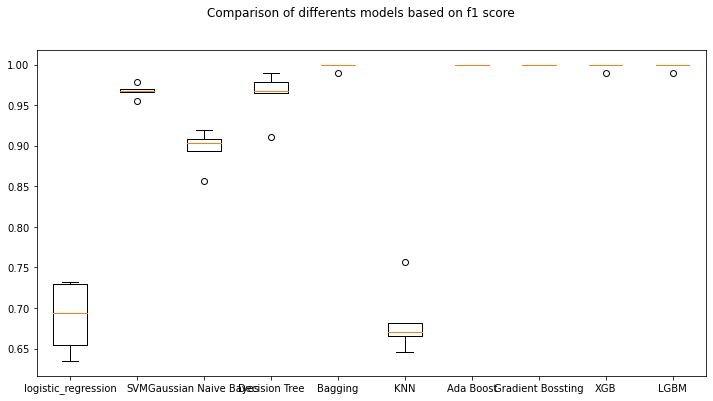

<Figure size 432x288 with 0 Axes>

In [61]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(f1_scores)
ax.set_xticklabels(names)
fig.suptitle('Comparison of differents models based on f1 score')
plt.show()
plt.savefig('Model_evaluation.png')